# Final Project Submission

Please fill out:
* Student name: Jamaal Darius Smith
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:
* Video of 5-min Non-Technical Presentation:


# TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=4rem>
    
- [Introduction](#INTRODUCTION)<br>
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- [Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>
</font>
___


# INTRODUCTION

The goal of this project is to create a multivariable linear regression that predicts the value of a house based on predictor variables.The insights from this model can prove valuable because it can be used for many purposes. From real estate agents being able to provide estimates to potential clients to academic researchers checking to see if homes in different neighborhoods are sold for prices that reflect their value based on intrinsic features instead of market dynamics, being able to estimate the price of homes in the Seattle area will be very fruitful in the real-world.



# OBTAIN

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn import preprocessing

data = pd.read_csv('kc_house_data.csv')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# SCRUB

The first step that must be taken to prepare the data for the model is to address any missing values like null values.

In [66]:
data = data.dropna()

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
id               15762 non-null int64
date             15762 non-null object
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null float64
condition        15762 non-null int64
grade            15762 non-null int64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null object
yr_built         15762 non-null int64
yr_renovated     15762 non-null float64
zipcode          15762 non-null int64
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 2.6+ MB


Next we must address the object datatype in the date and sqft_basement columns. During this step, we can also eliminate missing values represented by ? in sqft_basement column.

In [69]:
data.drop(data.loc[data['sqft_basement']=='?'].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 23 columns):
id               15429 non-null int64
date             15429 non-null datetime64[ns]
price            15429 non-null float64
bedrooms         15429 non-null int64
bathrooms        15429 non-null float64
sqft_living      15429 non-null int64
sqft_lot         15429 non-null int64
floors           15429 non-null float64
waterfront       15429 non-null float64
view             15429 non-null float64
condition        15429 non-null int64
grade            15429 non-null int64
sqft_above       15429 non-null int64
sqft_basement    15429 non-null object
yr_built         15429 non-null int64
yr_renovated     15429 non-null float64
zipcode          15429 non-null int64
lat              15429 non-null float64
long             15429 non-null float64
sqft_living15    15429 non-null int64
sqft_lot15       15429 non-null int64
year_sold        15429 non-null int64
month_sold       15429 non-nu

In [70]:
data['date'] = pd.to_datetime(data['date'])
data['year_sold'], data['month_sold'] = data['date'].dt.year, data['date'].dt.month
data['year_sold'].astype(int)
data['sqft_basement'].astype(float)

1         400.0
3         910.0
4           0.0
5        1530.0
8         730.0
9           0.0
11        300.0
13          0.0
14          0.0
15        970.0
16          0.0
17          0.0
19          0.0
20        760.0
21        720.0
22          0.0
24          0.0
25          0.0
27          0.0
29          0.0
30          0.0
31          0.0
32        820.0
33          0.0
34        780.0
35        790.0
36        730.0
37          0.0
38        330.0
39          0.0
          ...  
21548       0.0
21549       0.0
21552     710.0
21554     610.0
21555     900.0
21557     880.0
21558       0.0
21559       0.0
21560    1310.0
21561     650.0
21563     410.0
21564       0.0
21566     280.0
21568     320.0
21569       0.0
21570       0.0
21571       0.0
21572     190.0
21573       0.0
21574    1800.0
21580       0.0
21584       0.0
21585       0.0
21588       0.0
21590     910.0
21591     130.0
21592       0.0
21593       0.0
21594       0.0
21596       0.0
Name: sqft_basement, Len

# Explore and Transformation

The possibility of categorical variables being in the dataset is the next step needed to prepare the data for analysis. The plots below are one way of diagnosing the presence of this phenomenon. Looking at the unique values for each column suspected of being categorical will also be useful.

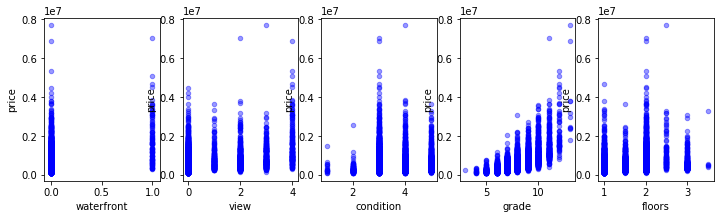

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,3))

for xcol, ax in zip(['waterfront','view', 'condition','grade','floors'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [72]:
items = ['waterfront','view', 'condition','grade','floors']

for item in items:
    print(f"{item} unique values",data[item].nunique())

waterfront unique values 2
view unique values 5
condition unique values 5
grade unique values 11
floors unique values 6


While the graphs above look like vertical lines, the presence of unique values showcases that the these varaibles just have large areas of concentration and are not categorical for the purposes of this model. The graphs below are designed to see whether or not there is a linear relationship between predictor variables and the dependent variable, price.

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


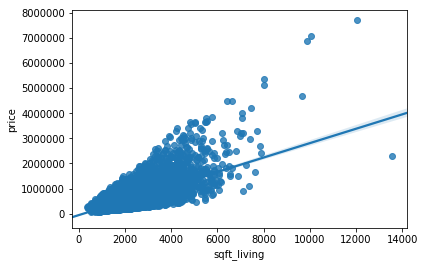

In [73]:
sns.regplot(x="sqft_living",y="price",data=data)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


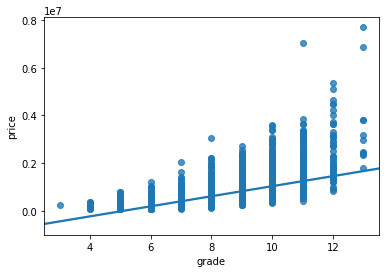

In [75]:
sns.regplot(x="grade",y="price",data=data)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


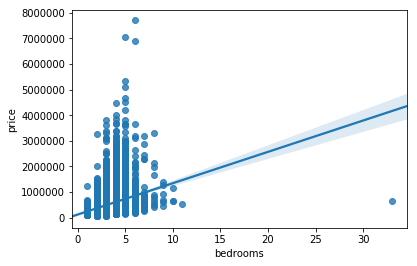

In [76]:
sns.regplot(x="bedrooms",y="price",data=data)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


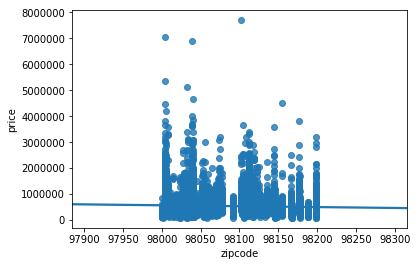

In [77]:
sns.regplot(x="zipcode",y="price",data=data)

While the variables such as waterfront were not deemed to be categorical, zipcode appears to be categorical. To test out this assumption, we will measure the regression model with zipcode as it was in the dataset and as a dummy variable.

In [109]:
zip_dummies = pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


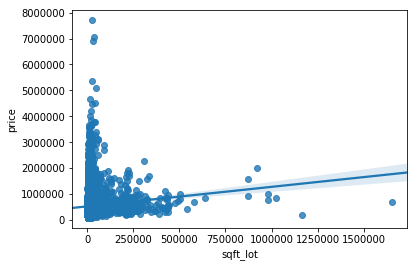

In [108]:
sns.regplot(x="sqft_lot",y="price",data=data)

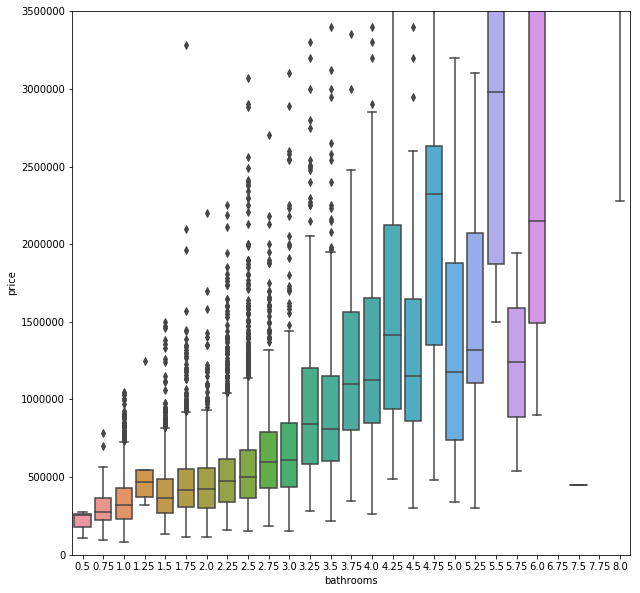

In [85]:
var = 'bathrooms'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)
fig.axis(ymin=0, ymax=3500000);



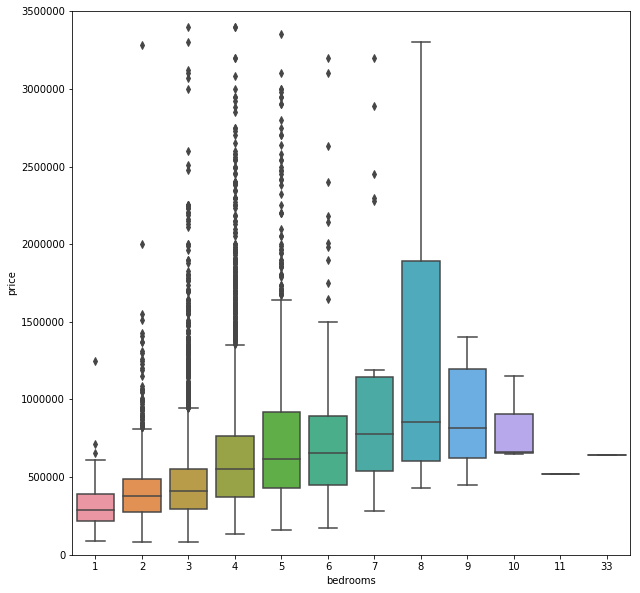

In [86]:
var = 'bedrooms'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)
fig.axis(ymin=0, ymax=3500000);

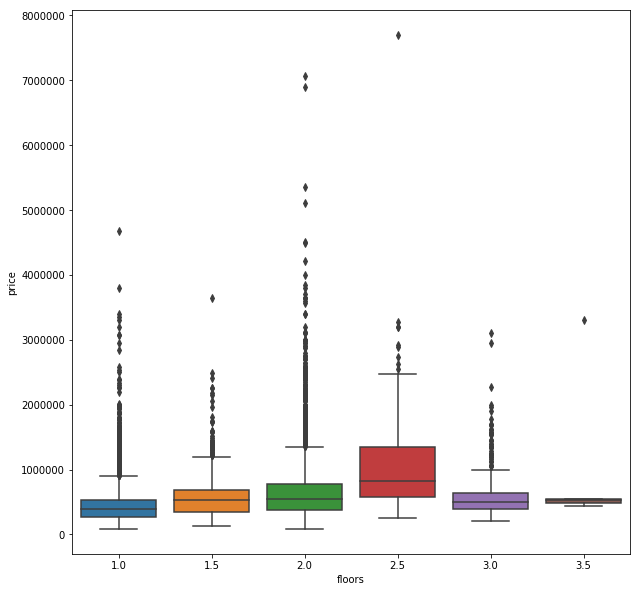

In [87]:
var = 'floors'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)

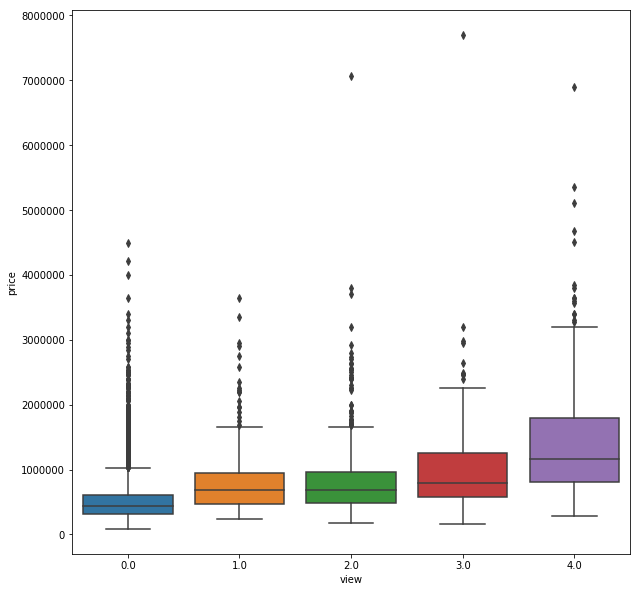

In [88]:
var = 'view'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)

In [83]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.706498
grade            0.664356
sqft_above       0.612374
sqft_living15    0.583400
bathrooms        0.525655
view             0.397786
lat              0.306991
bedrooms         0.305792
waterfront       0.275718
floors           0.260143
yr_renovated     0.120981
sqft_lot         0.084687
sqft_lot15       0.080569
yr_built         0.050528
condition        0.033172
long             0.021948
year_sold        0.005090
month_sold      -0.008817
id              -0.014954
zipcode         -0.049371
Name: price, dtype: float64

## Examination of Multicollinearity

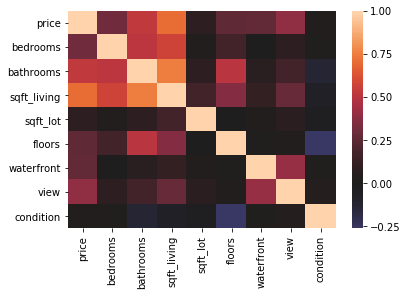

In [89]:
data_pred = data.iloc[:,2:11]
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

In [90]:
abs(data_pred.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
price,True,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False
floors,False,False,False,False,False,True,False,False,False
waterfront,False,False,False,False,False,False,True,False,False
view,False,False,False,False,False,False,False,True,False
condition,False,False,False,False,False,False,False,False,True


There is evidence of a linear relationship and it appears to be positive. Also, the presence of multicollinearity will inform my decision to combine some columns.

## Transformations and Scaling

Text(0.5, 1.0, 'after')

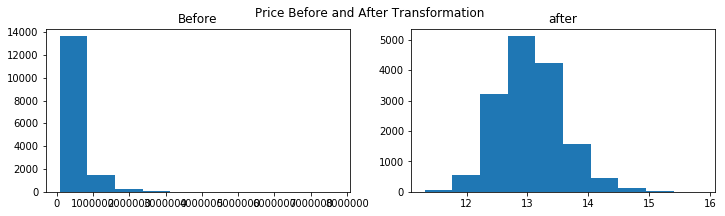

In [91]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.suptitle('Price Before and After Transformation')

ax1.hist(data['price'])
ax1.set_title('Before')


data['log_price'] = np.log(data['price'])
ax2.hist(data['log_price'])
ax2.set_title('after')

#logbeds = data['log_bedrooms']
#(acc - min(acc)) / (max(acc) - min(acc))
#scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
#data['scaled_beds'] = (logbeds - np.mean(logbeds) / np.sqrt(np.var(logbeds)))
#ax3.hist(data.scaled_beds)
#ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

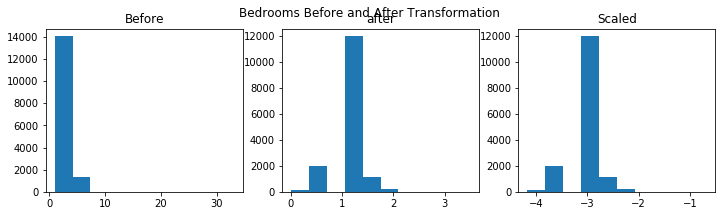

In [92]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Bedrooms Before and After Transformation')

ax1.hist(data['bedrooms'])
ax1.set_title('Before')


data['log_bedrooms'] = np.log(data['bedrooms'])
ax2.hist(data['log_bedrooms'])
ax2.set_title('after')

logbeds = data['log_bedrooms']
#(acc - min(acc)) / (max(acc) - min(acc))
#scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
data['scaled_beds'] = (logbeds - np.mean(logbeds) / np.sqrt(np.var(logbeds)))
ax3.hist(data.scaled_beds)
ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

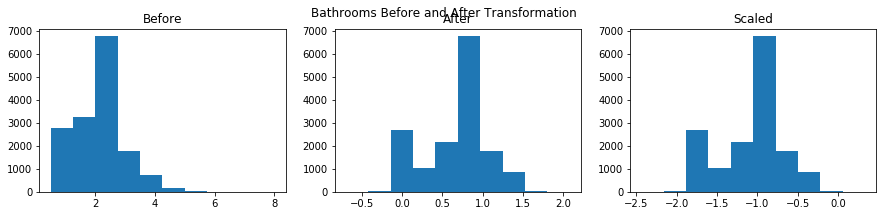

In [93]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
fig.suptitle('Bathrooms Before and After Transformation')

ax1.hist(data['bathrooms'])
ax1.set_title('Before')

data['log_bathrooms'] = np.log(data['bathrooms'])
ax2.hist(data['log_bathrooms'])
ax2.set_title('After')

logbathrooms = data['log_bathrooms']
data['scaled_bathrooms'] = (logbathrooms - np.mean(logbathrooms) / np.sqrt(np.var(logbathrooms)))
ax3.hist(data.scaled_bathrooms)
ax3.set_title('Scaled')

#(logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))

Text(0.5, 1.0, 'Scaled')

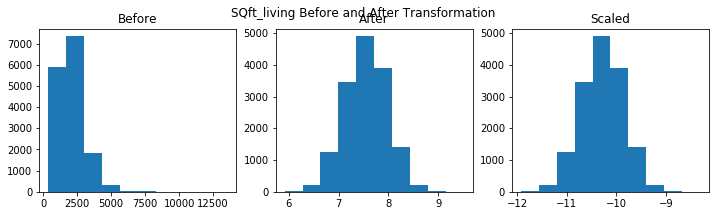

In [94]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('SQft_living Before and After Transformation')

ax1.hist(data['sqft_living'])
ax1.set_title('Before')

data['log_sqft_living'] = np.log(data['sqft_living'])
ax2.hist(data['log_sqft_living'])
ax2.set_title('After')

logsqftliving = data['log_sqft_living']
data['scaled_sqftliving'] = (logsqftliving - np.mean(logsqftliving) / np.sqrt(np.var(logsqftliving)))
ax3.hist(data.scaled_sqftliving)
ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

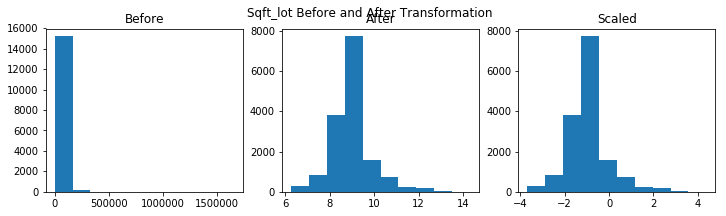

In [95]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Sqft_lot Before and After Transformation')

ax1.hist(data['sqft_lot'])
ax1.set_title('Before')

data['log_sqft_lot'] = np.log(data['sqft_lot'])
ax2.hist(data['log_sqft_lot'])
ax2.set_title('After')

logsqftlot = data['log_sqft_lot']
data['scaled_sqftlot'] = (logsqftlot - np.mean(logsqftlot) / np.sqrt(np.var(logsqftlot)))
ax3.hist(data.scaled_sqftlot)
ax3.set_title('Scaled')



Text(0.5, 1.0, 'Scaled')

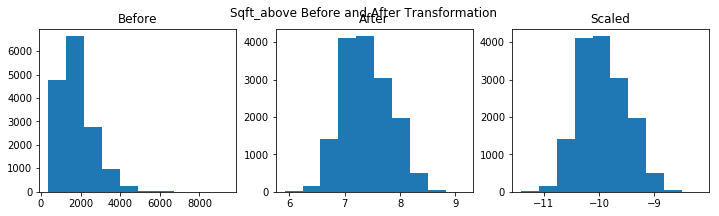

In [96]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Sqft_above Before and After Transformation')

ax1.hist(data['sqft_above'])
ax1.set_title('Before')

data['log_sqft_above'] = np.log(data['sqft_above'])
ax2.hist(data['log_sqft_above'])
ax2.set_title('After')


logsqftabove = data['log_sqft_above']
data['scaled_sqftabove'] = (logsqftabove - np.mean(logsqftabove) / np.sqrt(np.var(logsqftabove)))
ax3.hist(data.scaled_sqftabove)
ax3.set_title('Scaled')



Text(0.5, 1.0, 'Scaled')

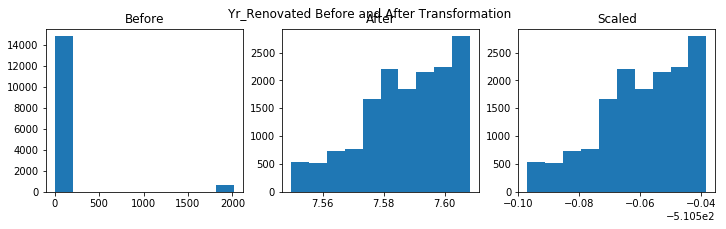

In [97]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Yr_Renovated Before and After Transformation')

ax1.hist(data['yr_renovated'])
ax1.set_title('Before')

data['yr_renovated_fill'] = data.yr_renovated.replace(0,data['yr_built'])
data['log_yr_renovated'] = np.log(data['yr_renovated_fill'])

ax2.hist(data['log_yr_renovated'])
ax2.set_title('After')


logyr_renovated = data['log_yr_renovated']
data['scaled_yr_renovated'] = (logyr_renovated - np.mean(logyr_renovated) / np.sqrt(np.var(logyr_renovated)))
ax3.hist(data.scaled_yr_renovated)
ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

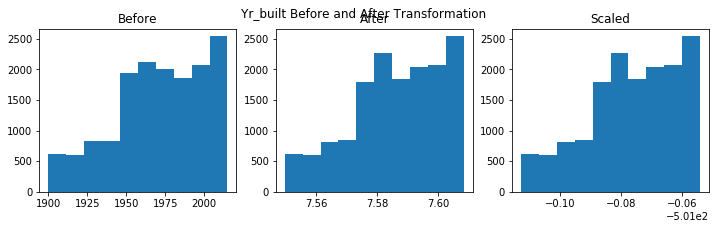

In [98]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Yr_built Before and After Transformation')

ax1.hist(data['yr_built'])
ax1.set_title('Before')

data['log_yr_built'] = np.log(data['yr_built'])
ax2.hist(data['log_yr_built'])
ax2.set_title('After')


logyr_built = data['log_yr_built']
data['scaled_yr_built'] = (logyr_built - np.mean(logyr_built) / np.sqrt(np.var(logyr_built)))
ax3.hist(data.scaled_yr_built)
ax3.set_title('Scaled')

# MODEL

First model without scaling/normalization

In [145]:
data_fin = pd.DataFrame([])
data_fin['sqft_lot'] = data['sqft_lot']
data_fin['sqft_living'] = data['sqft_living']
data_fin['sqft_above'] = data['sqft_above']
data_fin['zip_code'] = data['zipcode']
data_fin['bedrooms'] = data['bedrooms']
data_fin['view'] = data['view']
data_fin['grade'] = data['grade']
data_fin['bathrooms'] = data['bathrooms']
data_fin['yr_built'] = data['yr_built']
data_fin['renovated'] = data['yr_renovated']
data_fin['lat'] = data['lat']
data_fin['long'] = data['long']
data_fin['waterfront'] = data['waterfront']
data_fin['floors'] = data['floors']
data_fin['sqft_living15'] = data['sqft_living15']
data_fin['sqft_lot15'] = data['sqft_lot15']
price = data['price']
data_ols = pd.concat([price, data_fin,], axis=1)

In [146]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum


In [147]:
first = ols(formula= formula, data = data_ols, missing = 'drop').fit()
first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2242.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:50:43   Log-Likelihood:            -2.1056e+05
No. Observations:               15429   AIC:                         4.212e+05
Df Residuals:                   15412   BIC:                         4.213e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.062e+07   3.49e+06      3.046      0.002    3.78e+06    1.75e+07
sqft_lot          0.0778      0.057      1.373      0.170      -0.033       0.189
sqft_living     157.3833      5.234     30.070      0.000     147.124     167.643
sqft_above       34.2446      5.203      6.581      0.000      24.045      44.444
zip_code       -611.7333     39.411    -15.522      0.000    -688.984    -534.482
bedrooms      -3.647e+04   2253.129    -16.187      0.000   -4.09e+04   -3.21e+04
view           5.391e+04   2593.783     20.783      0.000    4.88e+04     5.9e+04
grade          9.436e+04   2609.592     36.158      0.000    8.92e+04    9.95e+04
bathrooms      4.628e+04   3913.104     11.828      0.000    3.86e+04     5.4e+04
yr_built      -2950.0996     82.450    -35.781      0.000   -3111.711   -2788.489
renovated        13.0472      4.380      2.979      0.003       4.463      21.632
lat            5.956e+05   1.29e+04     46.296      0.000     5.7e+05    6.21e+05
long           -2.15e+05   1.58e+04    -13.576      0.000   -2.46e+05   -1.84e+05
waterfront     6.209e+05    2.1e+04     29.613      0.000     5.8e+05    6.62e+05
floors         2174.0753   4335.629      0.501      0.616   -6324.269    1.07e+04
sqft_living15    14.8537      4.163      3.568      0.000       6.693      23.015
sqft_lot15       -0.3227      0.086     -3.739      0.000      -0.492      -0.154
==============================================================================
Omnibus:                    13239.638   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1402185.130
Skew:                           3.600   Prob(JB):                         0.00
Kurtosis:                      49.144   Cond. No.                     2.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

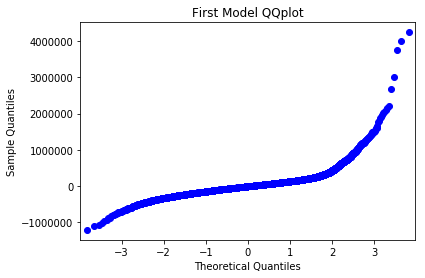

In [148]:
res = first.resid
fig = sm.qqplot(res)
plt.title('First Model QQplot')
plt.show()

## Revised Model

In [149]:
data_fin = pd.DataFrame([])
#data_fin['sqft_lot'] = data['scaled_sqftlot']
data_fin['sqft_living'] = data['scaled_sqftliving']
#data_fin['sqft_above'] = data['scaled_sqftabove']
data_fin['rooms'] = data['bedrooms'] + data['bathrooms']
data_fin['view'] = data['view']
data_fin['condition'] = data['condition']
data_fin['grade'] = data['grade']
data_fin['age_house'] = data['year_sold'] - data['yr_built']
data_fin['renovated'] = data['scaled_yr_renovated']
data_fin['lat'] = data['lat']
data_fin['long'] = data['long']
data_fin['waterfront'] = data['waterfront']
data_fin['floors'] = data['floors']
data_fin['sqft_living15'] = data['sqft_living15']
data_fin['sqft_lot15'] = data['sqft_lot15']
price = data['log_price']
data_ols = pd.concat([price, data_fin, zip_dummies], axis=1)

In [150]:
outcome = 'price'
predictors = data_ols.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum


In [151]:
second = ols(formula= formula, data = data_ols, missing = 'drop').fit()
second.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1351.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:51:19   Log-Likelihood:                 4251.6
No. Observations:               15429   AIC:                            -8337.
Df Residuals:                   15346   BIC:                            -7703.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1151.6050    132.960      8.661      0.000     890.987    1412.223
sqft_living       0.4118      0.008     53.241      0.000       0.397       0.427
rooms             0.0010      0.002      0.619      0.536      -0.002       0.004
view              0.0585      0.002     24.731      0.000       0.054       0.063
condition         0.0491      0.003     18.821      0.000       0.044       0.054
grade             0.1042      0.002     43.888      0.000       0.100       0.109
age_house         0.0017      0.000     13.119      0.000       0.001       0.002
renovated         2.3437      0.260      9.014      0.000       1.834       2.853
lat               0.4731      0.086      5.522      0.000       0.305       0.641
long             -0.3123      0.063     -4.935      0.000      -0.436      -0.188
waterfront        0.4913      0.019     25.540      0.000       0.454       0.529
floors            0.0023      0.004      0.618      0.537      -0.005       0.010
sqft_living15  9.163e-05   3.88e-06     23.606      0.000     8.4e-05    9.92e-05
sqft_lot15     8.402e-07   6.09e-08     13.793      0.000    7.21e-07     9.6e-07
zip_98002         0.0198      0.020      1.013      0.311      -0.018       0.058
zip_98003        -0.0045      0.017     -0.257      0.797      -0.039       0.030
zip_98004         0.9926      0.032     31.099      0.000       0.930       1.055
zip_98005         0.6105      0.034     17.997      0.000       0.544       0.677
zip_98006         0.5376      0.028     19.204      0.000       0.483       0.592
zip_98007         0.5378      0.035     15.227      0.000       0.469       0.607
zip_98008         0.5483      0.033     16.370      0.000       0.483       0.614
zip_98010         0.3378      0.031     11.059      0.000       0.278       0.398
zip_98011         0.2480      0.044      5.699      0.000       0.163       0.333
zip_98014         0.3161      0.048      6.622      0.000       0.223       0.410
zip_98019         0.2235      0.047      4.717      0.000       0.131       0.316
zip_98022         0.1979      0.026      7.554      0.000       0.147       0.249
zip_98023        -0.0552      0.016     -3.380      0.001      -0.087      -0.023
zip_98024         0.4570      0.042     10.822      0.000       0.374       0.540
zip_98027         0.4672      0.029     16.170      0.000       0.411       0.524
zip_98028         0.2124      0.042      5.036      0.000       0.130       0.295
zip_98029         0.5590      0.033     16.971      0.000       0.494       0.624
zip_98030         0.0614      0.020      3.145      0.002       0.023       0.100
zip_98031         0.0603      0.020      2.978      0.003       0.021       0.100
zip_98032        -0.0516      0.023     -2.275      0.023      -0.096      -0.007
zip_98033         0.6322      0.036     17.435   

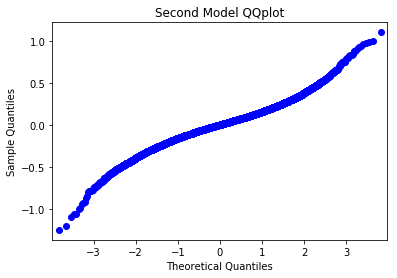

In [166]:
res = second.resid
fig=sm.qqplot(res)
plt.title('Second Model QQplot')
plt.show()

While the R-squared score went up markedly, some of the variables have p-values that are not statistically significant. The combination of columns to form the room column will be eliminated in the next model and replaced with the bedrooms column. The decision to not include bathrooms is because it is highly correlated with the sqft_living item.

## Final Model

In [153]:
data_fin = pd.DataFrame([])
#data_fin['sqft_lot'] = data['scaled_sqftlot']
data_fin['sqft_living'] = data['scaled_sqftliving']
#data_fin['sqft_above'] = data['scaled_sqftabove']
data_fin['bathrooms'] = data['bathrooms']
data_fin['view'] = data['view']
data_fin['condition'] = data['condition']
data_fin['grade'] = data['grade']
data_fin['age_house'] = data['year_sold'] - data['yr_built']
data_fin['renovated'] = data['scaled_yr_renovated']
data_fin['lat'] = data['lat']
data_fin['long'] = data['long']
data_fin['waterfront'] = data['waterfront']
data_fin['sqft_living15'] = data['sqft_living15']
data_fin['sqft_lot15'] = data['sqft_lot15']
price = data['log_price']
data_ols = pd.concat([price, data_fin, zip_dummies], axis=1)

In [154]:
outcome = 'price'
predictors = data_ols.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum


In [155]:
third = ols(formula= formula, data = data_ols, missing = 'drop').fit()
third.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1374.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:52:49   Log-Likelihood:                 4284.9
No. Observations:               15429   AIC:                            -8406.
Df Residuals:                   15347   BIC:                            -7779.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       995.5052    133.513      7.456      0.000     733.804    1257.207
sqft_living       0.3843      0.007     54.452      0.000       0.371       0.398
bathrooms         0.0280      0.003      8.197      0.000       0.021       0.035
view              0.0578      0.002     24.533      0.000       0.053       0.062
condition         0.0476      0.003     18.286      0.000       0.042       0.053
grade             0.1032      0.002     43.960      0.000       0.099       0.108
age_house         0.0018      0.000     13.900      0.000       0.002       0.002
renovated         2.0386      0.261      7.807      0.000       1.527       2.550
lat               0.4790      0.085      5.606      0.000       0.312       0.646
long             -0.3100      0.063     -4.910      0.000      -0.434      -0.186
waterfront        0.4886      0.019     25.470      0.000       0.451       0.526
sqft_living15  9.171e-05   3.87e-06     23.694      0.000    8.41e-05    9.93e-05
sqft_lot15     8.471e-07   6.06e-08     13.974      0.000    7.28e-07    9.66e-07
zip_98002         0.0173      0.019      0.889      0.374      -0.021       0.055
zip_98003        -0.0054      0.017     -0.313      0.754      -0.039       0.029
zip_98004         0.9878      0.032     31.022      0.000       0.925       1.050
zip_98005         0.6071      0.034     17.935      0.000       0.541       0.673
zip_98006         0.5354      0.028     19.170      0.000       0.481       0.590
zip_98007         0.5350      0.035     15.189      0.000       0.466       0.604
zip_98008         0.5452      0.033     16.316      0.000       0.480       0.611
zip_98010         0.3410      0.030     11.192      0.000       0.281       0.401
zip_98011         0.2436      0.043      5.613      0.000       0.159       0.329
zip_98014         0.3122      0.048      6.558      0.000       0.219       0.405
zip_98019         0.2198      0.047      4.651      0.000       0.127       0.312
zip_98022         0.1987      0.026      7.602      0.000       0.147       0.250
zip_98023        -0.0549      0.016     -3.372      0.001      -0.087      -0.023
zip_98024         0.4529      0.042     10.751      0.000       0.370       0.535
zip_98027         0.4640      0.029     16.100      0.000       0.407       0.520
zip_98028         0.2090      0.042      4.968      0.000       0.127       0.291
zip_98029         0.5533      0.033     16.852      0.000       0.489       0.618
zip_98030         0.0601      0.019      3.089      0.002       0.022       0.098
zip_98031         0.0576      0.020      2.855      0.004       0.018       0.097
zip_98032        -0.0500      0.023     -2.209      0.027      -0.094      -0.006
zip_98033         0.6285      0.036     17.376      0.000       0.558       0.699
zip_98034         0.3734      0.039      9.641   

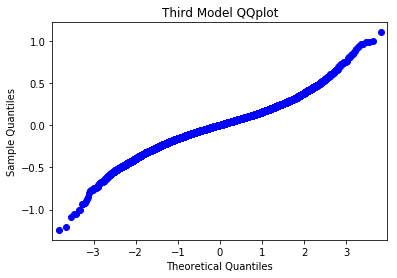

In [157]:
res = third.resid
fig = sm.qqplot(res)
plt.title('Third Model QQplot')
plt.show()

# iNTERPRET

Text(0.5, 1.0, 'Residuals of Third Model')

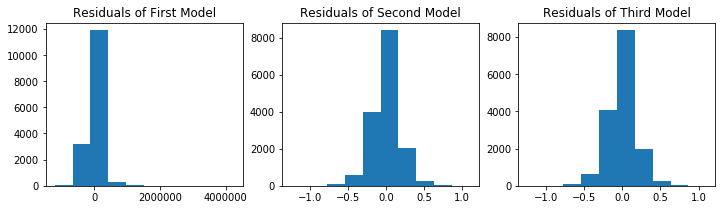

In [168]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))


ax1.hist(first.resid)
ax1.set_title('Residuals of First Model')

ax2.hist(second.resid)
ax2.set_title('Residuals of Second Model')

ax3.hist(third.resid)
ax3.set_title('Residuals of Third Model')



In [174]:
print(first.pvalues)
print(first.rsquared)

Intercept         2.326586e-03
sqft_lot          1.698086e-01
sqft_living      4.358678e-193
sqft_above        4.814375e-11
zip_code          6.328794e-54
bedrooms          1.899869e-58
view              1.209475e-94
grade            7.397200e-275
bathrooms         3.846645e-32
yr_built         2.025000e-269
renovated         2.896045e-03
lat               0.000000e+00
long              9.674084e-42
waterfront       1.758959e-187
floors            6.160658e-01
sqft_living15     3.612459e-04
sqft_lot15        1.850807e-04
dtype: float64
0.6994608150440355


In [176]:
print(second.pvalues)
print(second.rsquared)

Intercept         5.124130e-18
sqft_living       0.000000e+00
rooms             5.356507e-01
view             1.938979e-132
condition         3.843704e-78
grade             0.000000e+00
age_house         4.139349e-39
renovated         2.220484e-19
lat               3.404788e-08
long              8.078622e-07
waterfront       6.196636e-141
floors            5.366481e-01
sqft_living15    4.702396e-121
sqft_lot15        5.061535e-43
zip_98002         3.109658e-01
zip_98003         7.969240e-01
zip_98004        5.715374e-206
zip_98005         1.111352e-71
zip_98006         3.064088e-81
zip_98007         5.639082e-52
zip_98008         1.004044e-59
zip_98010         2.531736e-28
zip_98011         1.224406e-08
zip_98014         3.652282e-11
zip_98019         2.419596e-06
zip_98022         4.473291e-14
zip_98023         7.270255e-04
zip_98024         3.412810e-27
zip_98027         2.487149e-58
zip_98028         4.802499e-07
                     ...      
zip_98092         4.682700e-05
zip_9810

In [187]:
print(third.pvalues)
print(third.rsquared)

Intercept         9.378570e-14
sqft_living       0.000000e+00
bathrooms         2.661763e-16
view             2.129921e-130
condition         6.476440e-74
grade             0.000000e+00
age_house         1.164921e-43
renovated         6.209392e-15
lat               2.104944e-08
long              9.212626e-07
waterfront       3.444370e-140
sqft_living15    6.322020e-122
sqft_lot15        4.196771e-44
zip_98002         3.739863e-01
zip_98003         7.539551e-01
zip_98004        5.517857e-205
zip_98005         3.371021e-71
zip_98006         5.811448e-81
zip_98007         9.869912e-52
zip_98008         2.410685e-59
zip_98010         5.786421e-29
zip_98011         2.017325e-08
zip_98014         5.635054e-11
zip_98019         3.332531e-06
zip_98022         3.095317e-14
zip_98023         7.493059e-04
zip_98024         7.308659e-27
zip_98027         7.541068e-58
zip_98028         6.845434e-07
zip_98029         3.754115e-63
                     ...      
zip_98092         3.800141e-05
zip_9810

This final model has a r-squared score of 87.9% and all non-categorical variables have p-values below 5% making the regression's results statistically significant

As discovered in the preparation of the data, there was a general positive relationship between many of the predictor values and the dependent variable, price. Moreover, there is a statistically significant relationship present as the probability of the model's f-statistic is zero and allows us to reject the null hypothesis. 

This final model has a r-squared score of 87.9% and all non-categorical variables have p-values below 5% making the regression's results statistically significant

# CONCLUSIONS & RECOMMENDATIONS

With a high-degree of certainty, the model developed with the statsmodel library allows us predict the value of homes in the Seattle area. The preprocessing of data did it's best to promote normalilty in the dataset, but the QQplots show some traces of skew in the residuals. 

 - The factors that are important in determining the value of a home include: amount of living space, number of bathrooms, and number of times house is viewed during sales process.
 - The zip code categorical variable really did not do a great job of predicting the homes value. One has to wonder if there is a way to include some input for the home's location into a different type of regression model
 - Areas ofimprovement for the model include cleaning of the data. At times, I did not know whether I should have addressed the scale for some of the predictor variables. Also, while multicollinearity was addressed in the final model's variable selection, it still might be present and affecting the final analysis slightly.